In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# import scikit_posthocs as sp
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## ELT

In [2]:
bat_landings = pd.read_csv('dataset1.csv')
observation_windows = pd.read_csv('dataset2.csv')

In [3]:
bat_landings.info()
bat_landings.head()
bat_landings.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 907 non-null    object 
 1   bat_landing_to_food        907 non-null    float64
 2   habit                      866 non-null    object 
 3   rat_period_start           907 non-null    object 
 4   rat_period_end             907 non-null    object 
 5   seconds_after_rat_arrival  907 non-null    int64  
 6   risk                       907 non-null    int64  
 7   reward                     907 non-null    int64  
 8   month                      907 non-null    int64  
 9   sunset_time                907 non-null    object 
 10  hours_after_sunset         907 non-null    float64
 11  season                     907 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 85.2+ KB


,bat_landing_to_food,seconds_after_rat_arrival,risk,reward,month,hours_after_sunset,season
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,11.713134,282.877619,0.495039,0.533627,3.800441,5.531863,0.833517
std,27.644410,240.974918,0.500251,0.499143,1.199190,2.414146,0.372719
min,0.010238,0.000000,0.000000,0.000000,0.000000,-0.261667,0.000000
25%,1.000000,89.500000,0.000000,0.000000,4.000000,3.779028,1.000000
50%,4.000000,206.000000,0.000000,1.000000,4.000000,5.622778,1.000000
75%,11.500000,446.500000,1.000000,1.000000,5.000000,7.402778,1.000000
max,443.000000,949.000000,1.000000,1.000000,5.000000,12.091944,1.000000


In [4]:
observation_windows.info()
observation_windows.head()
observation_windows.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                2123 non-null   object 
 1   month               2123 non-null   int64  
 2   hours_after_sunset  2123 non-null   float64
 3   bat_landing_number  2123 non-null   int64  
 4   food_availability   2123 non-null   float64
 5   rat_minutes         2123 non-null   float64
 6   rat_arrival_number  2123 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 116.2+ KB


,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
count,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000
mean,3.083844,5.265426,32.083373,2.445874,1.994442,0.444654
std,1.642261,4.076188,25.614431,1.218353,6.793397,1.019195
min,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,11.000000,1.962206,0.000000,0.000000
50%,4.000000,5.000000,27.000000,2.951877,0.000000,0.000000
75%,4.000000,8.500000,48.000000,3.105873,0.158333,1.000000
max,6.000000,13.500000,178.000000,4.000000,120.000000,17.000000


## Preprocessing 

In [5]:
bat_landings['start_time'] = pd.to_datetime(bat_landings['start_time'])
bat_landings['rat_period_start'] = pd.to_datetime(bat_landings['rat_period_start'])
bat_landings['rat_period_end'] = pd.to_datetime(bat_landings['rat_period_end'])
bat_landings['sunset_time'] = pd.to_datetime(bat_landings['sunset_time'])
observation_windows["time"] = pd.to_datetime(observation_windows["time"])

In [6]:
print("\nDuplicate Rows in Bat Landings:", bat_landings.duplicated().sum())
print("Duplicate Rows in Observation Windows:", observation_windows.duplicated().sum())


Duplicate Rows in Bat Landings: 1
Duplicate Rows in Observation Windows: 0


In [7]:
print("\nBat Landings - Summary Statistics:")
print(bat_landings.describe())
print("\nObservation Windows - Summary Statistics:")
print(observation_windows.describe())


Bat Landings - Summary Statistics:
                          start_time  bat_landing_to_food  \
count                            907           907.000000   
mean   2018-04-11 20:41:27.056229120            11.713134   
min              2017-12-26 20:57:00             0.010238   
25%              2018-04-03 23:29:00             1.000000   
50%              2018-04-27 00:28:00             4.000000   
75%              2018-05-01 00:07:30            11.500000   
max              2018-05-31 23:34:00           443.000000   
std                              NaN            27.644410   

                    rat_period_start                 rat_period_end  \
count                            907                            907   
mean   2018-04-11 20:36:43.395810304  2018-04-11 20:45:54.178610944   
min              2017-12-26 20:53:00            2017-12-26 20:58:00   
25%              2018-04-03 23:24:00            2018-04-03 23:40:00   
50%              2018-04-27 00:24:00            2018-04-27 

In [8]:
# Missing values
print("\nBat Landings - Missing Values:")
print(bat_landings.isnull().sum())
print("\nBat Landings - Missing Value Percentages:")
print((bat_landings.isnull().sum() / len(bat_landings) * 100).round(2))

print("\nObservation Windows - Missing Values:")
print(observation_windows.isnull().sum())
print("\nObservation Windows - Missing Value Percentages:")
print((observation_windows.isnull().sum() / len(observation_windows) * 100).round(2))


Bat Landings - Missing Values:
start_time                    0
bat_landing_to_food           0
habit                        41
rat_period_start              0
rat_period_end                0
seconds_after_rat_arrival     0
risk                          0
reward                        0
month                         0
sunset_time                   0
hours_after_sunset            0
season                        0
dtype: int64

Bat Landings - Missing Value Percentages:
start_time                   0.00
bat_landing_to_food          0.00
habit                        4.52
rat_period_start             0.00
rat_period_end               0.00
seconds_after_rat_arrival    0.00
risk                         0.00
reward                       0.00
month                        0.00
sunset_time                  0.00
hours_after_sunset           0.00
season                       0.00
dtype: float64

Observation Windows - Missing Values:
time                  0
month                 0
hours_after_sunset

In [9]:
bat_landings = bat_landings.sort_values(by='start_time').reset_index(drop=True)
observation_windows = observation_windows.sort_values(by='time').reset_index(drop=True)

In [13]:
# IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    return outliers

# Z-score method
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column].dropna()))
    outliers = data[z_scores > threshold][column]
    return outliers


# Example for key numerical columns
for col in ['bat_landing_to_food', 'seconds_after_rat_arrival']:  # Adjust columns as needed
    print(f"\nBat Landings - Outliers in {col} (IQR):")
    print(detect_outliers_iqr(bat_landings, col).count())
    print(f"Bat Landings - Outliers in {col} (Z-score):")
    print(detect_outliers_zscore(bat_landings, col).count())

for col in ['bat_landing_number', 'rat_minutes']:  # Adjust columns as needed
    print(f"\nObservation Windows - Outliers in {col} (IQR):")
    print(detect_outliers_iqr(observation_windows, col).count())
    print(f"Observation Windows - Outliers in {col} (Z-score):")
    print(detect_outliers_zscore(observation_windows, col).count())



Bat Landings - Outliers in bat_landing_to_food (IQR):
88
Bat Landings - Outliers in bat_landing_to_food (Z-score):
16

Bat Landings - Outliers in seconds_after_rat_arrival (IQR):
0
Bat Landings - Outliers in seconds_after_rat_arrival (Z-score):
0

Observation Windows - Outliers in bat_landing_number (IQR):
24
Observation Windows - Outliers in bat_landing_number (Z-score):
13

Observation Windows - Outliers in rat_minutes (IQR):
511
Observation Windows - Outliers in rat_minutes (Z-score):
42


In [23]:
# Drop outliers from bat_landings and observation_windows using IQR method

def drop_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Drop outliers for key numerical columns in bat_landings
for col in ['bat_landing_to_food', 'seconds_after_rat_arrival']:
    bat_landings = drop_outliers_iqr(bat_landings, col)

# Drop outliers for key numerical columns in observation_windows
for col in ['bat_landing_number', 'rat_minutes']:
    observation_windows = drop_outliers_iqr(observation_windows, col)

In [24]:
# Check for negative values in time-related columns
for col in ['bat_landing_to_food', 'seconds_after_rat_arrival']:
    if col in bat_landings.columns:
        print(f"\nBat Landings - Negative values in {col}:")
        print((bat_landings[col] < 0).sum())

for col in ['rat_minutes']:
    if col in observation_windows.columns:
        print(f"\nObservation Windows - Negative values in {col}:")
        print((observation_windows[col] < 0).sum())

# Check datetime validity (example for datetime columns)
for col in bat_landings.select_dtypes(include='datetime64').columns:
    print(f"\nBat Landings - Invalid dates in {col}:")
    print(bat_landings[col].isna().sum())  # Add custom checks for impossible dates


Bat Landings - Negative values in bat_landing_to_food:
0

Bat Landings - Negative values in seconds_after_rat_arrival:
0

Observation Windows - Negative values in rat_minutes:
0

Bat Landings - Invalid dates in start_time:
0

Bat Landings - Invalid dates in rat_period_start:
0

Bat Landings - Invalid dates in rat_period_end:
0

Bat Landings - Invalid dates in sunset_time:
0


In [15]:
# Check unique values in categorical columns
for col in bat_landings.select_dtypes(include='object').columns:
    print(f"\nBat Landings - Unique values in {col}:")
    print(bat_landings[col].value_counts())

for col in observation_windows.select_dtypes(include='object').columns:
    print(f"\nObservation Windows - Unique values in {col}:")
    print(observation_windows[col].value_counts())


Bat Landings - Unique values in habit:
habit
fast                                                245
rat                                                 221
pick                                                139
bat                                                  30
bat_fight                                            26
                                                   ... 
bat_fight_rat                                         1
bat_rat                                               1
380.6,321.1,550.6,477.5; 263.0,267.0,421.0,435.0      1
rat_bat                                               1
rat_bat_fight                                         1
Name: count, Length: 81, dtype: int64


In [25]:
bat_landings = bat_landings.dropna()
observation_windows = observation_windows.dropna()

In [16]:
bat_landings.info()
bat_landings.head()
bat_landings.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   start_time                 907 non-null    datetime64[ns]
 1   bat_landing_to_food        907 non-null    float64       
 2   habit                      866 non-null    object        
 3   rat_period_start           907 non-null    datetime64[ns]
 4   rat_period_end             907 non-null    datetime64[ns]
 5   seconds_after_rat_arrival  907 non-null    int64         
 6   risk                       907 non-null    int64         
 7   reward                     907 non-null    int64         
 8   month                      907 non-null    int64         
 9   sunset_time                907 non-null    datetime64[ns]
 10  hours_after_sunset         907 non-null    float64       
 11  season                     907 non-null    int64         
dtypes: datet

,start_time,bat_landing_to_food,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
count,907,907.000000,907,907,907.000000,907.000000,907.000000,907.000000,907,907.000000,907.000000
mean,2018-04-11 20:41:27.056229120,11.713134,2018-04-11 20:36:43.395810304,2018-04-11 20:45:54.178610944,282.877619,0.495039,0.533627,3.800441,2018-04-11 15:10:02.050716416,5.531863,0.833517
min,2017-12-26 20:57:00,0.010238,2017-12-26 20:53:00,2017-12-26 20:58:00,0.000000,0.000000,0.000000,0.000000,2017-12-26 16:43:00,-0.261667,0.000000
25%,2018-04-03 23:29:00,1.000000,2018-04-03 23:24:00,2018-04-03 23:40:00,89.500000,0.000000,0.000000,4.000000,2018-04-03 19:01:00,3.779028,1.000000
50%,2018-04-27 00:28:00,4.000000,2018-04-27 00:24:00,2018-04-27 00:28:00,206.000000,0.000000,1.000000,4.000000,2018-04-26 19:17:00,5.622778,1.000000
75%,2018-05-01 00:07:30,11.500000,2018-05-01 00:06:00,2018-05-01 00:09:00,446.500000,1.000000,1.000000,5.000000,2018-04-30 19:20:00,7.402778,1.000000
max,2018-05-31 23:34:00,443.000000,2018-05-31 23:31:00,2018-05-31 23:34:00,949.000000,1.000000,1.000000,5.000000,2018-05-31 19:41:00,12.091944,1.000000
std,NaN,27.644410,NaN,NaN,240.974918,0.500251,0.499143,1.199190,NaN,2.414146,0.372719


In [17]:
observation_windows.info()
observation_windows.head()
observation_windows.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                2123 non-null   datetime64[ns]
 1   month               2123 non-null   int64         
 2   hours_after_sunset  2123 non-null   float64       
 3   bat_landing_number  2123 non-null   int64         
 4   food_availability   2123 non-null   float64       
 5   rat_minutes         2123 non-null   float64       
 6   rat_arrival_number  2123 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 116.2 KB


,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
count,2123,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000
mean,2018-03-19 17:54:20.970324992,3.083844,5.265426,32.083373,2.445874,1.994442,0.444654
min,2017-12-26 16:13:00,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-02-06 01:03:00,2.000000,2.000000,11.000000,1.962206,0.000000,0.000000
50%,2018-04-04 05:01:00,4.000000,5.000000,27.000000,2.951877,0.000000,0.000000
75%,2018-04-30 23:35:00,4.000000,8.500000,48.000000,3.105873,0.158333,1.000000
max,2018-06-01 05:41:00,6.000000,13.500000,178.000000,4.000000,120.000000,17.000000
std,NaN,1.642261,4.076188,25.614431,1.218353,6.793397,1.019195


## Statics

In [26]:
# Descriptive stats for key variables in dataset1
print("Dataset1 Key Descriptives:")
print(bat_landings[['bat_landing_to_food', 'seconds_after_rat_arrival', 'risk', 'reward']].describe())

# Grouped means (e.g., by risk)
print("\nMeans by Risk (0=avoid, 1=take):")
print(bat_landings.groupby('risk')[['bat_landing_to_food', 'reward']].mean())

# Binning seconds_after_rat_arrival for rat recency (e.g., recent < 200s, late > 200s based on ~median)
bat_landings['rat_recency'] = pd.cut(bat_landings['seconds_after_rat_arrival'], bins=[-1, 200, float('inf')], labels=['recent', 'late'])
print("\nMeans by Rat Recency:")
print(bat_landings.groupby('rat_recency')['bat_landing_to_food'].mean())

# For dataset2
print("\nDataset2 Key Descriptives:")
print(observation_windows[['bat_landing_number', 'rat_arrival_number', 'rat_minutes', 'food_availability']].describe())

# Correlation matrix for dataset2
print("\nDataset2 Correlations:")
print(observation_windows[['bat_landing_number', 'rat_arrival_number', 'rat_minutes']].corr())

Dataset1 Key Descriptives:
       bat_landing_to_food  seconds_after_rat_arrival        risk      reward
count           785.000000                 785.000000  785.000000  785.000000
mean              5.919847                 275.866242    0.487898    0.564331
std               6.712330                 235.169384    0.500172    0.496160
min               0.010238                   0.000000    0.000000    0.000000
25%               1.000000                  87.000000    0.000000    0.000000
50%               3.000000                 203.000000    0.000000    1.000000
75%               8.000000                 433.000000    1.000000    1.000000
max              28.000000                 949.000000    1.000000    1.000000

Means by Risk (0=avoid, 1=take):
      bat_landing_to_food    reward
risk                               
0                4.256900  0.935323
1                7.665289  0.174935

Means by Rat Recency:
rat_recency
recent    5.256127
late      6.565222
Name: bat_landing_to

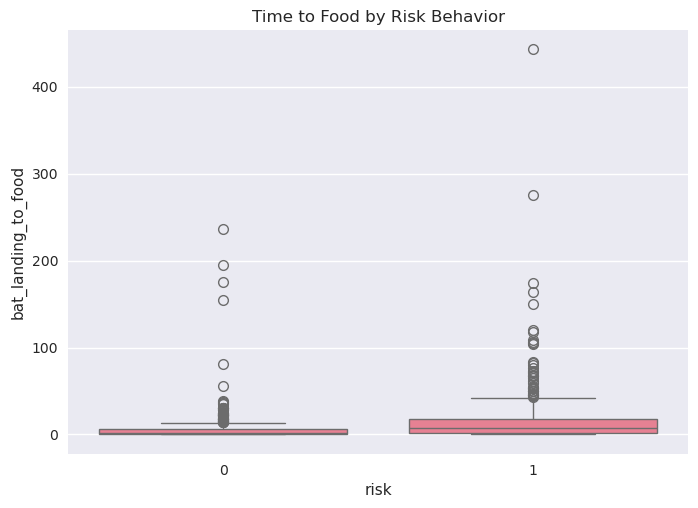

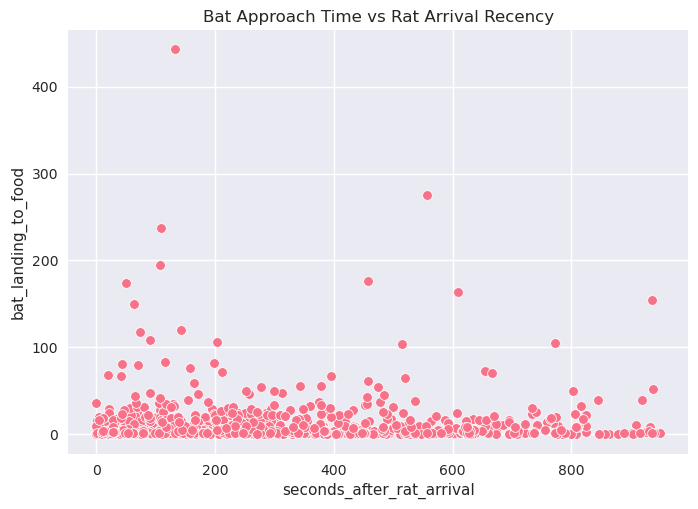

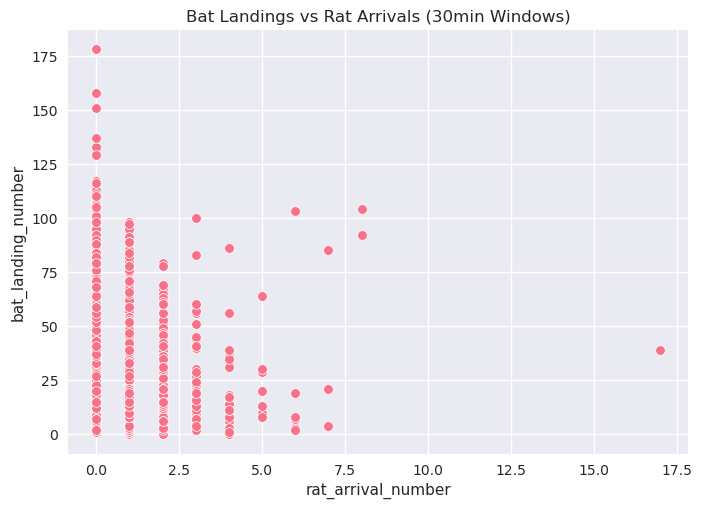

In [20]:
# Boxplot: bat_landing_to_food by risk
sns.boxplot(data=bat_landings, x='risk', y='bat_landing_to_food')
plt.title('Time to Food by Risk Behavior')
plt.show()

# Scatter: seconds_after_rat_arrival vs bat_landing_to_food
sns.scatterplot(data=bat_landings, x='seconds_after_rat_arrival', y='bat_landing_to_food')
plt.title('Bat Approach Time vs Rat Arrival Recency')
plt.show()

# For dataset2: Scatter rat presence vs bat landings
sns.scatterplot(data=observation_windows, x='rat_arrival_number', y='bat_landing_number')
plt.title('Bat Landings vs Rat Arrivals (30min Windows)')
plt.show()

In [27]:
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest  # Add this import!
import pandas as pd  # If not already imported

# 1. Independent t-test: bat_landing_to_food by risk (two-tailed)
group_avoid = bat_landings[bat_landings['risk'] == 0]['bat_landing_to_food']
group_take = bat_landings[bat_landings['risk'] == 1]['bat_landing_to_food']
t_stat_risk, p_val_risk = stats.ttest_ind(group_avoid, group_take, equal_var=False)  # Welch's for unequal variance
print(f"T-test (Risk-Avoid vs Risk-Take): t={t_stat_risk:.4f}, p={p_val_risk:.4f}")
print(f"Means: Avoid={group_avoid.mean():.2f}s (n={len(group_avoid)}), Take={group_take.mean():.2f}s (n={len(group_take)})")
if p_val_risk < 0.05:
    print("Reject H0: Significant difference in approach time by risk behavior.")
else:
    print("Fail to reject H0: No significant difference.")

# 2. Correlation: seconds_after_rat_arrival vs bat_landing_to_food (expect negative if recent rats increase avoidance)
corr, p_corr = stats.pearsonr(bat_landings['seconds_after_rat_arrival'], bat_landings['bat_landing_to_food'])
print(f"\nPearson Correlation (Rat Recency vs Approach Time): r={corr:.4f}, p={p_corr:.4f}")
if p_corr < 0.05:
    print("Significant correlation.")
else:
    print("No significant correlation.")

# 3. T-test for recent vs late rat arrival (using median threshold for balance)
median_sec = bat_landings['seconds_after_rat_arrival'].median()
recent = bat_landings[bat_landings['seconds_after_rat_arrival'] <= median_sec]['bat_landing_to_food']
late = bat_landings[bat_landings['seconds_after_rat_arrival'] > median_sec]['bat_landing_to_food']
t_stat_time, p_val_time = stats.ttest_ind(recent, late, equal_var=False)
print(f"\nT-test (Recent vs Late Rat Arrival): t={t_stat_time:.4f}, p={p_val_time:.4f}")
print(f"Means: Recent={recent.mean():.2f}s (n={len(recent)}), Late={late.mean():.2f}s (n={len(late)})")
if p_val_time < 0.05:
    print("Reject H0: Bats take longer to approach food after recent rat arrivals (evidence of avoidance).")
else:
    print("Fail to reject H0.")

# 4. Chi-square: Association between risk and reward (crosstab expected)
contingency = pd.crosstab(bat_landings['risk'], bat_landings['reward'])
chi2, p_chi, dof, expected = stats.chi2_contingency(contingency)
print(f"\nChi-square (Risk vs Reward): χ²={chi2:.4f}, p={p_chi:.4f}, df={dof}")
if p_chi < 0.05:
    print("Reject H0: Risk and reward behaviors are associated (e.g., avoidance less rewarding).")
else:
    print("Fail to reject H0.")

# 5. For dataset2: Correlation between rat_arrival_number and bat_landing_number (expect negative if rats deter bats)
corr_rat_bat, p_rat_bat = stats.pearsonr(observation_windows['rat_arrival_number'], observation_windows['bat_landing_number'])
print(f"\nCorrelation (Rat Arrivals vs Bat Landings): r={corr_rat_bat:.4f}, p={p_rat_bat:.4f}")
if p_rat_bat < 0.05:
    print("Significant: Rat presence reduces bat landings.")
else:
    print("No significant effect.")

# Fixed Z-test for proportions (high-risk: risk=1 in recent vs non-recent)
prop_overall = bat_landings['risk'].mean()
prop_recent = bat_landings[bat_landings['seconds_after_rat_arrival'] <= median_sec]['risk'].mean()
recent_mask = bat_landings['seconds_after_rat_arrival'] <= median_sec
n_recent = recent_mask.sum()
count_recent_high_risk = bat_landings.loc[recent_mask, 'risk'].sum()
n_non_recent = len(bat_landings) - n_recent
count_non_recent_high_risk = bat_landings.loc[~recent_mask, 'risk'].sum()
print(f"\nHigh-Risk Counts: Recent={count_recent_high_risk} (n={n_recent}), Non-Recent={count_non_recent_high_risk} (n={n_non_recent})")
print(f"Proportions: Recent={prop_recent:.3f}, Non-Recent={count_non_recent_high_risk / n_non_recent:.3f}, Overall={prop_overall:.3f}")
z_stat, p_z = proportions_ztest([count_recent_high_risk, count_non_recent_high_risk], 
                                [n_recent, n_non_recent], 
                                alternative='two-sided')
print(f"Z-test (Prop High-Risk: Recent vs Non-Recent): z={z_stat:.4f}, p={p_z:.4f}")
if p_z < 0.05:
    print("Reject H0: Significant difference in high-risk behavior by rat recency.")
else:
    print("Fail to reject H0: No significant difference.")

T-test (Risk-Avoid vs Risk-Take): t=-7.2937, p=0.0000
Means: Avoid=4.26s (n=402), Take=7.67s (n=383)
Reject H0: Significant difference in approach time by risk behavior.

Pearson Correlation (Rat Recency vs Approach Time): r=0.0601, p=0.0922
No significant correlation.

T-test (Recent vs Late Rat Arrival): t=-2.7588, p=0.0059
Means: Recent=5.26s (n=393), Late=6.58s (n=392)
Reject H0: Bats take longer to approach food after recent rat arrivals (evidence of avoidance).

Chi-square (Risk vs Reward): χ²=458.1619, p=0.0000, df=1
Reject H0: Risk and reward behaviors are associated (e.g., avoidance less rewarding).

Correlation (Rat Arrivals vs Bat Landings): r=0.0149, p=0.5521
No significant effect.

High-Risk Counts: Recent=190 (n=393), Non-Recent=193 (n=392)
Proportions: Recent=0.483, Non-Recent=0.492, Overall=0.488
Z-test (Prop High-Risk: Recent vs Non-Recent): z=-0.2491, p=0.8033
Fail to reject H0: No significant difference.


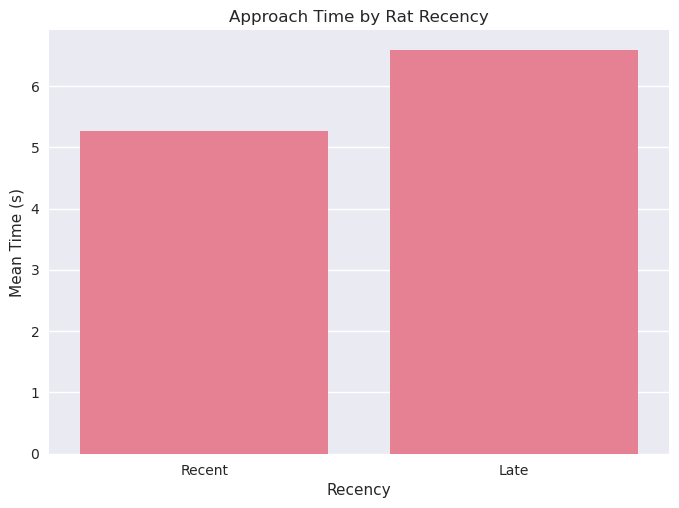

In [28]:
# Bar for means by recency
recency_means = pd.DataFrame({'Recency': ['Recent', 'Late'], 'Mean Time (s)': [5.26, 6.58]})
sns.barplot(data=recency_means, x='Recency', y='Mean Time (s)')
plt.title('Approach Time by Rat Recency')
plt.show()

## Visualization

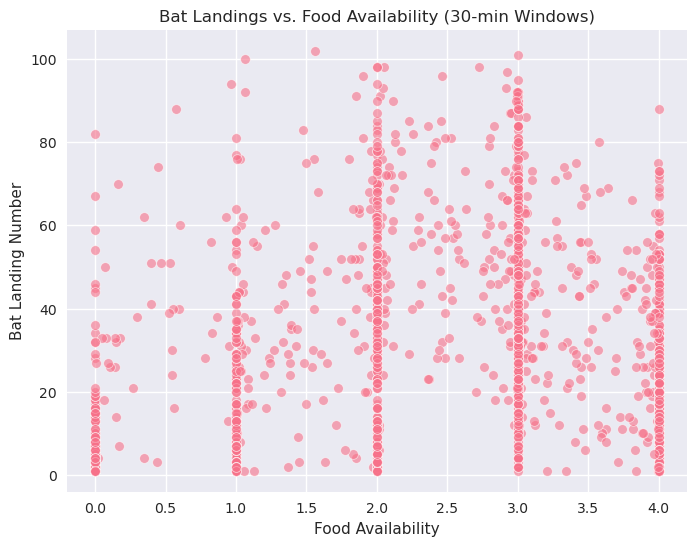

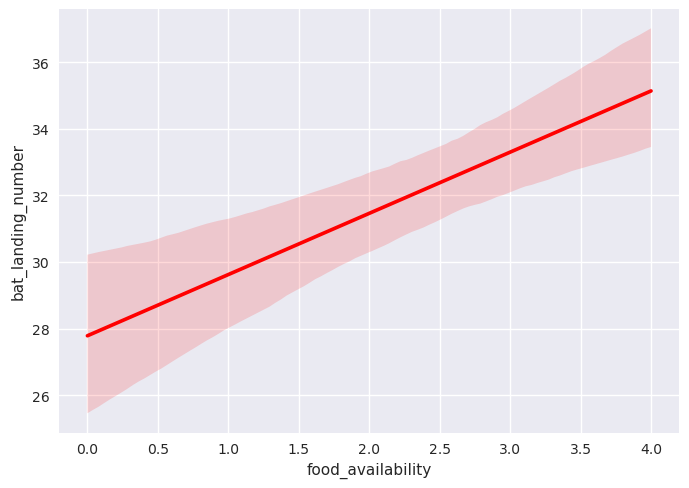

In [29]:
# Bat landings vs food availability (Dataset2)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=observation_windows, x='food_availability', y='bat_landing_number', alpha=0.6)
plt.title('Bat Landings vs. Food Availability (30-min Windows)')
plt.xlabel('Food Availability')
plt.ylabel('Bat Landing Number')
plt.show()
# Optional: Add trend line
sns.regplot(data=observation_windows, x='food_availability', y='bat_landing_number', scatter=False, color='red')
plt.show()

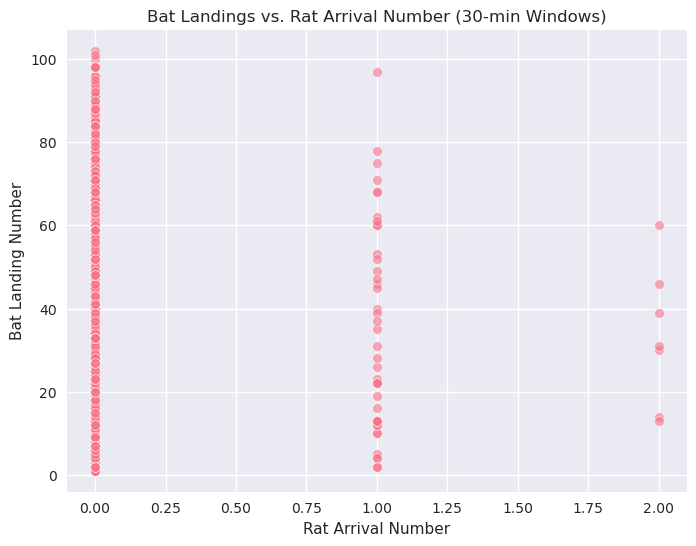

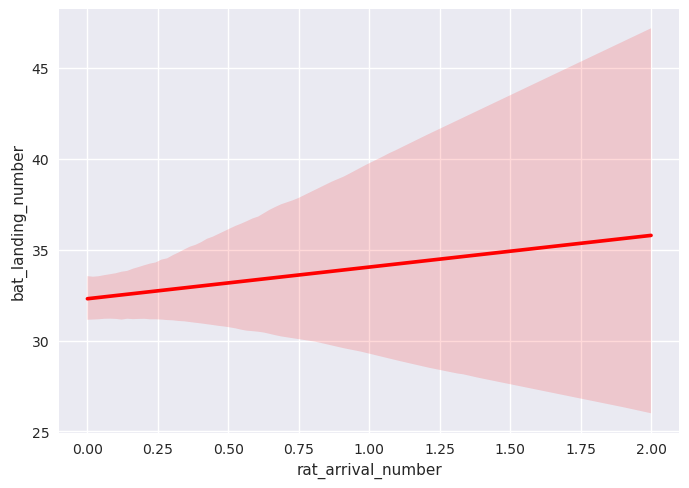

In [30]:
# Bat landings vs rat arrivals number (Dataset2)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=observation_windows, x='rat_arrival_number', y='bat_landing_number', alpha=0.6)
plt.title('Bat Landings vs. Rat Arrival Number (30-min Windows)')
plt.xlabel('Rat Arrival Number')
plt.ylabel('Bat Landing Number')
plt.show()
# Optional: Add trend line
sns.regplot(data=observation_windows, x='rat_arrival_number', y='bat_landing_number', scatter=False, color='red')
plt.show()

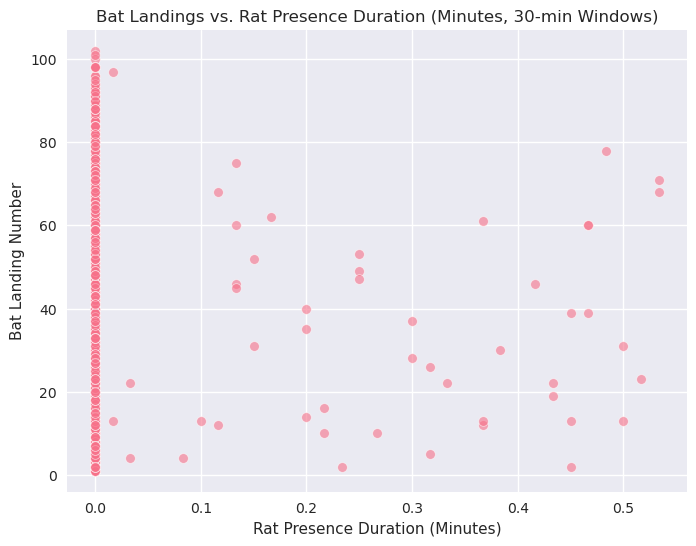

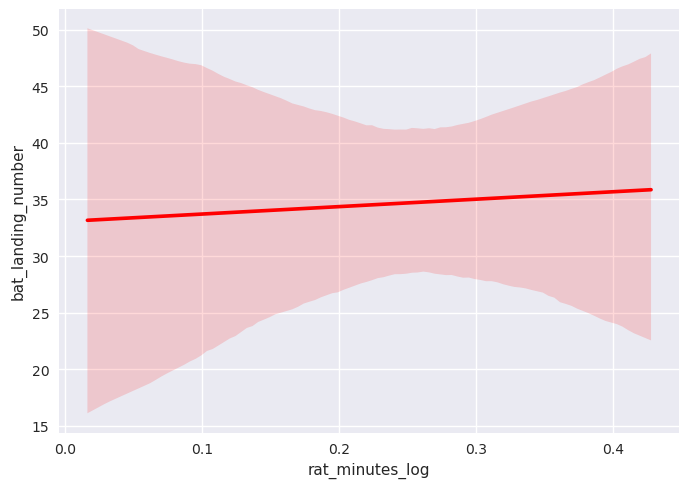

In [31]:
# Bat landings vs rat presence duration (Dataset2)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=observation_windows, x='rat_minutes', y='bat_landing_number', alpha=0.6)
plt.title('Bat Landings vs. Rat Presence Duration (Minutes, 30-min Windows)')
plt.xlabel('Rat Presence Duration (Minutes)')
plt.ylabel('Bat Landing Number')
plt.show()
# Optional: Add trend line (log scale if skewed)
observation_windows_log = observation_windows[observation_windows['rat_minutes'] > 0].copy()
observation_windows_log['rat_minutes_log'] = np.log(observation_windows_log['rat_minutes'] + 1)
sns.regplot(data=observation_windows_log, x='rat_minutes_log', y='bat_landing_number', scatter=False, color='red')
plt.show()

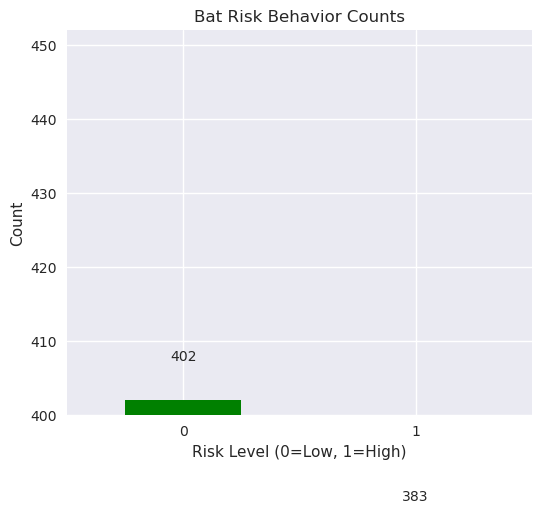

In [32]:
# Risk behavior bar chart (Dataset1)
risk_counts = bat_landings['risk'].value_counts().sort_index()
plt.figure(figsize=(6, 5))
risk_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Bat Risk Behavior Counts')
plt.xlabel('Risk Level (0=Low, 1=High)')
plt.ylabel('Count')
plt.ylim(400, risk_counts.max() + 50)  # Start from 400, add padding
plt.xticks(rotation=0)
for i, v in enumerate(risk_counts):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')
plt.show()


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

# Load data (replace with your file paths)
df1 = pd.read_csv('dataset1.csv')  # Bat landings
df2 = pd.read_csv('dataset2.csv')  # 30-min intervals

# Explore dataset1
print("Dataset1 Shape:", df1.shape)
print(df1.info())
print(df1.describe())
print("Missing values in dataset1:\n", df1.isnull().sum())

# Explore dataset2
print("\nDataset2 Shape:", df2.shape)
print(df2.info())
print(df2.describe())
print("Missing values in dataset2:\n", df2.isnull().sum())

# Handle missing data ethically (e.g., drop rows with key missing vars or impute with median for times)
df1 = df1.dropna(subset=['bat_landing_to_food', 'seconds_after_rat_arrival', 'risk'])  # Example: drop if core vars missing
# For times, if NaN in rat_period, assume no rat presence

# Feature engineering: Create 'rat_present' flag in df1
df1['rat_present'] = np.where((df1['seconds_after_rat_arrival'] >= 0) & 
                              (df1['start_time'] <= df1['rat_period_end']), 1, 0)  # Adjust logic based on data

# Another feature: 'vigilance_proxy' = bat_landing_to_food (higher = more vigilant)
print(df1['rat_present'].value_counts())  # Check distribution

Dataset1 Shape: (907, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 907 non-null    object 
 1   bat_landing_to_food        907 non-null    float64
 2   habit                      866 non-null    object 
 3   rat_period_start           907 non-null    object 
 4   rat_period_end             907 non-null    object 
 5   seconds_after_rat_arrival  907 non-null    int64  
 6   risk                       907 non-null    int64  
 7   reward                     907 non-null    int64  
 8   month                      907 non-null    int64  
 9   sunset_time                907 non-null    object 
 10  hours_after_sunset         907 non-null    float64
 11  season                     907 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 85.2+ KB
None
       bat_landin

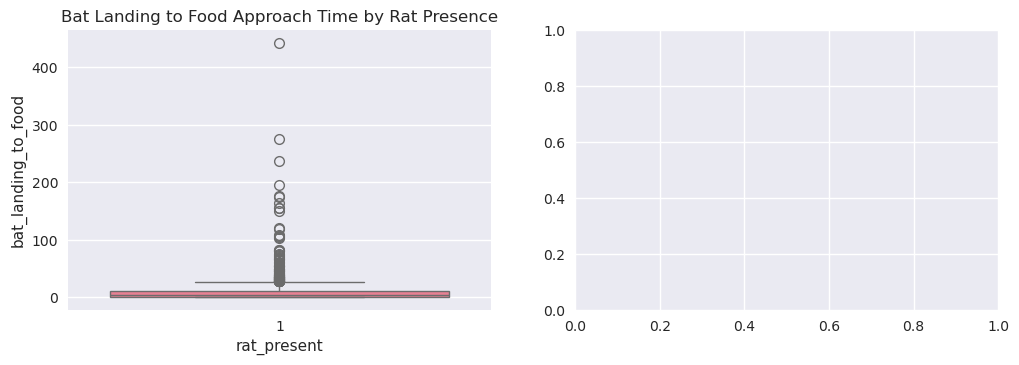

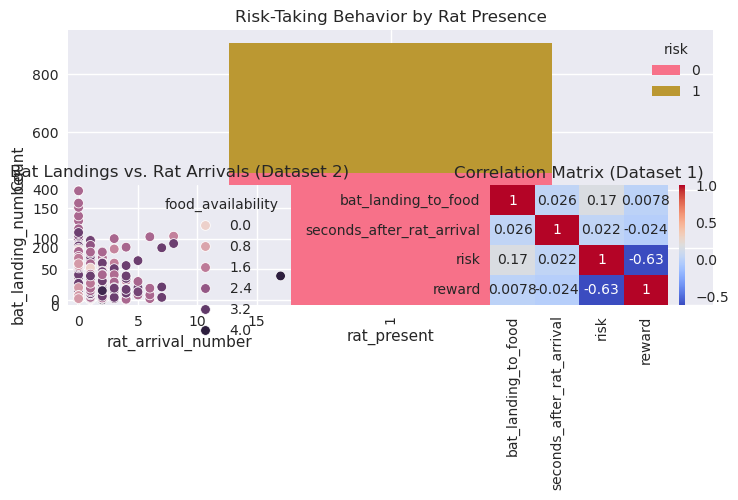

Mean delay to food when rats present: 11.713133940775084
Mean delay to food when rats absent: nan
Risk-taking rate when rats present: 0.49503858875413453


In [35]:
# Visualizations for descriptive analysis
plt.figure(figsize=(12, 8))

# Box plot: Delay to food by rat presence
plt.subplot(2, 2, 1)
sns.boxplot(data=df1, x='rat_present', y='bat_landing_to_food')
plt.title('Bat Landing to Food Approach Time by Rat Presence')

# Bar plot: Risk-taking by rat presence
plt.subplot(2, 2, 2)
risk_rat = df1.groupby(['rat_present', 'risk']).size().unstack().fillna(0)
risk_rat.plot(kind='bar', stacked=True)
plt.title('Risk-Taking Behavior by Rat Presence')
plt.ylabel('Count')

# From dataset2: Bat landings vs. rat arrivals
plt.subplot(2, 2, 3)
sns.scatterplot(data=df2, x='rat_arrival_number', y='bat_landing_number', hue='food_availability')
plt.title('Bat Landings vs. Rat Arrivals (Dataset 2)')

# Correlation matrix for key vars
plt.subplot(2, 2, 4)
key_vars = ['bat_landing_to_food', 'seconds_after_rat_arrival', 'risk', 'reward']
sns.heatmap(df1[key_vars].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Dataset 1)')

plt.tight_layout()
plt.show()

# Summary stats
print("Mean delay to food when rats present:", df1[df1['rat_present']==1]['bat_landing_to_food'].mean())
print("Mean delay to food when rats absent:", df1[df1['rat_present']==0]['bat_landing_to_food'].mean())
print("Risk-taking rate when rats present:", df1[df1['rat_present']==1]['risk'].mean())